In [ ]:
!pip install fastai timm


In [2]:
from fastai.vision.all import *
import timm


In [3]:
train_path='/content/drive/MyDrive/fire_classification/'

In [4]:
train_files = get_image_files(train_path)

In [5]:
dls = ImageDataLoaders.from_folder(
    train_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=224,mult = 1,
    do_flip = True,
    flip_vert = False,
    max_rotate = 10,
    min_zoom = 1,
    max_zoom = 1.1,
    max_lighting = 0.2,
    max_warp = 0.2,
    p_affine = 0.75,
    p_lighting = 0.75,
    mode = "bilinear",
    pad_mode = "reflection",
    align_corners = True,
     batch = 32,
     min_scale = 0.75))


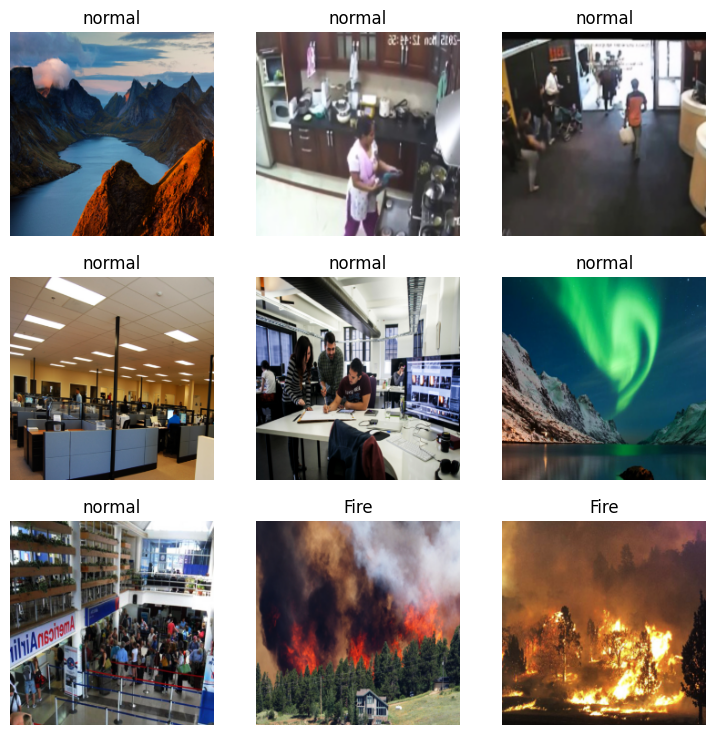

In [6]:
dls.show_batch()


In [7]:
timm.list_models('convnext*')


['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [8]:
learn = vision_learner(dls, "convnext_base_in22k", metrics=accuracy).to_fp16()


/usr/local/lib/python3.10/dist-packages/timm/models/_factory.py:114: UserWarning: Mapping deprecated model name convnext_base_in22k to current convnext_base.fb_in22k.
  model = create_fn(


In [9]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 128 x 56 x 56  
Conv2d                                    6272       False     
LayerNorm2d                               256        True      
Identity                                                       
Conv2d                                    6400       False     
LayerNorm                                 256        True      
____________________________________________________________________________
                     64 x 56 x 56 x 512  
Linear                                    66048      False     
GELU                                                           
Dropout                                                        
____________________________________________________________________________
                     64 x 56 x 56 x 128  
Linear                                    65664      False     
Dropout                            

In [10]:
learn.fine_tune(10)


epoch,train_loss,valid_loss,accuracy,time
0,0.351902,0.071218,0.993007,04:06


epoch,train_loss,valid_loss,accuracy,time
0,0.089951,0.014161,0.996503,00:38
1,0.063014,0.007598,0.996503,00:36
2,0.049773,0.012431,0.993007,00:36
3,0.036254,0.006145,0.996503,00:38
4,0.028816,0.014762,0.996503,00:36
5,0.021565,0.005308,1.000000,00:38
6,0.017466,0.003792,1.000000,00:38
7,0.012919,0.004567,0.996503,00:36
8,0.010645,0.004638,0.996503,00:37
9,0.009395,0.004387,0.996503,00:36


In [ ]:
torch.save(learn,'/content/drive/MyDrive/Fire_convnext_base_in22k.pkl')